In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os
from boson_data_lib import *

In [3]:

os.chdir("/home/zah/POP23/TESTS/")


In [22]:
#file_name = 'df_POP_RmLME_trn4_gap_tst20_fix-Phi-up_2023-Aug-07_at_15-44.h5.pkl'
no_rm_tst_file_name = 'df_POP_NoRmLME_trn4_gap_tst20_fix-Phi-up_2023-Aug-07_at_16-29.h5.pkl'
rm_tst_file_name = 'df_POP_RmLME_trn4_gap_tst20_fix-Phi-up_2023-Aug-07_at_15-44.h5.pkl'


no_rm_tst_df = pd.read_pickle(no_rm_tst_file_name)
rm_tst_df = pd.read_pickle(rm_tst_file_name)

In [23]:
def add_log_infidelities(df):
    df['LogInF_lme_exact'] = np.log10(df['InF_lme_exact'])
    df['LogInF_sidlme_lme'] = np.log10(np.abs(df['InF_sidlme_lme']))
    df['LogInF_sidexact_exact'] = np.log10(df['InF_sidexact_exact'])
    #df['Gamma'] = df['Gamma'].astype(float)
    
    return df    

In [24]:
no_rm_tst_df = add_log_infidelities(no_rm_tst_df)
rm_tst_df = add_log_infidelities(rm_tst_df)

In [25]:
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

In [ ]:
best_init_rho =  np.array([[ 0.96693975+0.j        , -0.17832301+0.00560344j],
                               [-0.17832301-0.00560344j,  0.03306025+0.j        ]])
data_dir = r"/home/zah/POP23/DATA/"
fid_dists = fidelity_distances(data_dir, best_init_rho);

/tmp/ipykernel_2986/2417250430.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(palette)(val)[:,:3]


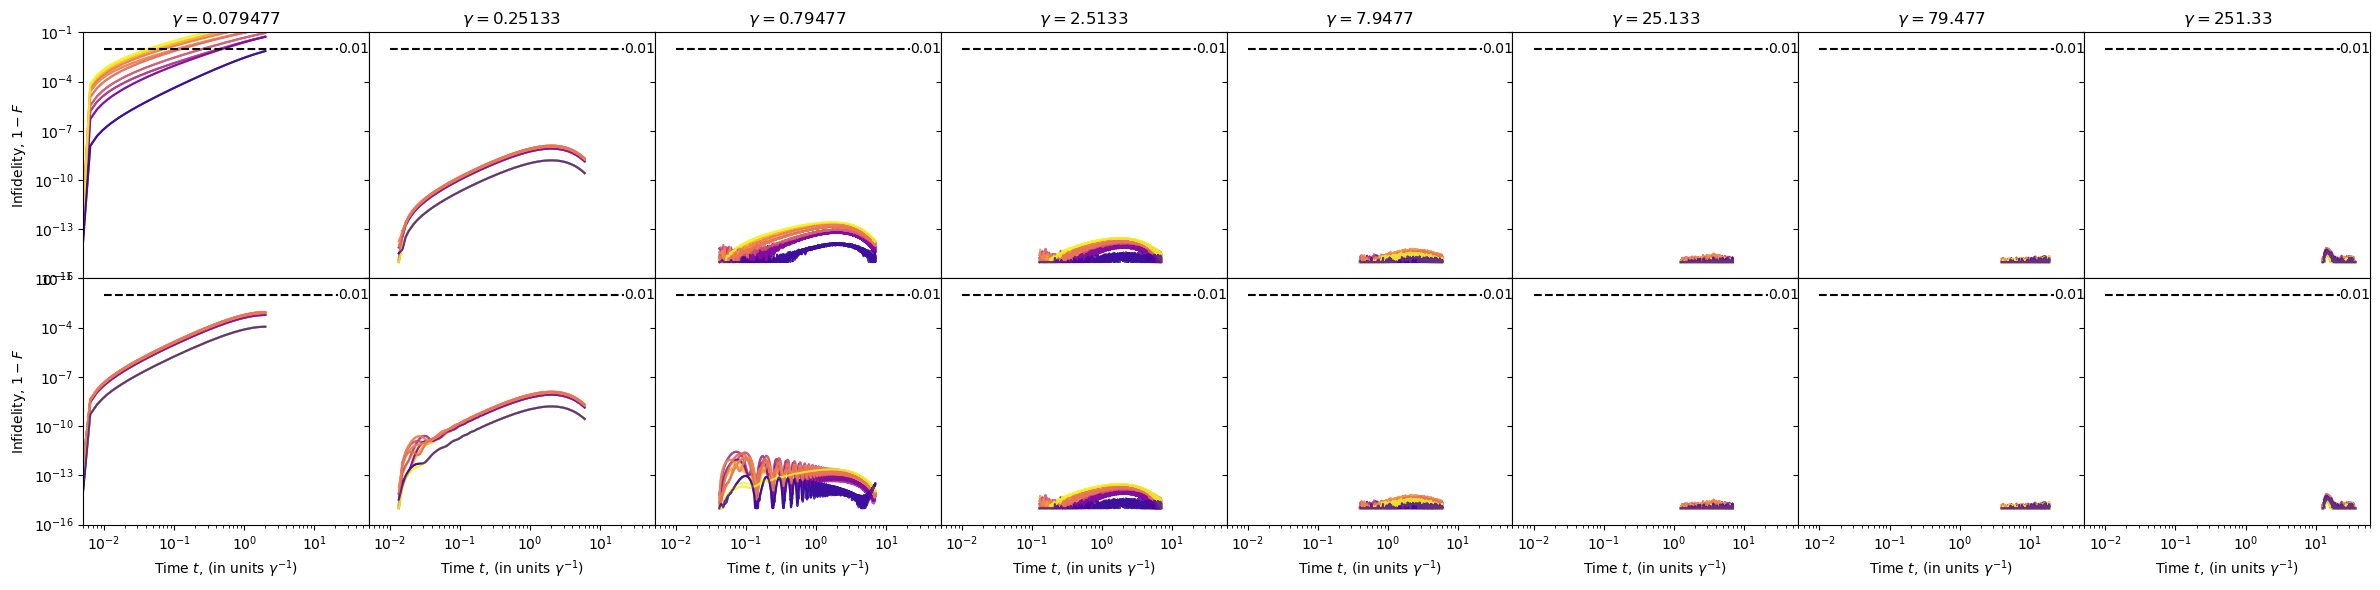

In [33]:
df1 = no_rm_tst_df
df2 = rm_tst_df

gamma = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

n = len(gamma)

fig, ax = plt.subplots(2, 8, figsize=(3*8, 3*2), sharey=True, sharex=True)

ax[0,0].set_ylim(1e-16, 1e-1)
ax[0,0].set_xlim(.5e-2, 60)


ax[0,0].set_ylabel(r"Infidelity, $1-F$")
ax[1,0].set_ylabel(r"Infidelity, $1-F$")

val = np.array(fid_dists) 
val -= val.min()
val /= val.max()

palette = 'plasma'
colors = plt.cm.get_cmap(palette)(val)[:,:3]

for i in range(8):
    for state in range(20):
        dfs = df1[(df1['Gamma'] == gamma[i])&(df1['State'] == str(state+1))]
        x = np.array(dfs.get('gt'))
        y = np.array(dfs.get('InF_sidlme_lme'))
        ax[0, i].loglog(x,y, color=colors[state], alpha=0.8)
        ax[0, i].set_title(r'$\gamma = $'+ gamma[i])
    #ax[0, i].hlines(y=.02, xmin=1e-1, xmax=30, colors='black', linestyles='--')
    #ax[0, i].text(30,.02, '0.02', ha='left', va='center')
    ax[0, i].hlines(y=.01, xmin=1e-2, xmax=22, colors='black', linestyles='--')
    ax[0, i].text(22,.01, '0.01', ha='left', va='center')

for i in range(8):
    for state in range(20):
        dfs = df2[(df2['Gamma'] == gamma[i])&(df2['State'] == str(state+1))]
        x = np.array(dfs.get('gt'))
        y = np.array(dfs.get('InF_sidlme_lme'))
        ax[1, i].loglog(x,y, color=colors[state], alpha=0.8)
        #ax[1, i].set_title(r'$\gamma = $'+ gamma[i])
        ax[1, i].set_xlabel(r"Time $t$, (in units $\gamma^{-1}$)")
    #ax[1, i].hlines(y=.02, xmin=1e-1, xmax=30, colors='black', linestyles='--')
    #ax[1, i].text(30,.02, '0.02', ha='left', va='center')
    ax[1, i].hlines(y=.01, xmin=1e-2, xmax=22, colors='black', linestyles='--')
    ax[1, i].text(22,.01, '0.01', ha='left', va='center')

fig.tight_layout()
fig.subplots_adjust(hspace = .0, wspace =.0)

In [34]:
fig.savefig("SimLME_evolve.pdf")